# Segmentez des clients d'un site e-commerce

- **Projet 5 du parcours ¬´ Data Scientist ¬ª d‚ÄôOpenClassrooms**
- **Mark Creasey**

## Partie 1 : Nettoyage et analyse exploratoire des donn√©es

<img  width="76" height="30" src="https://olist.com/wp-custom/themes/olist20/assets/img/brand.svg" alt="Logo olist">


<!--TABLE OF CONTENTS-->

- [1. Compr√©hension du probl√®me](#1.-Compr√©hension-du-probl√®me)
  - [1.1 Mission](#1.1-Mission)
  - [1.2 Requirements : Biblioth√®ques utilis√©es dans ce notebook](#1.2-Requirements-:-Biblioth√®ques-utilis√©es-dans-ce-notebook)
  - [1.3 Des fonctions utilitaires](#1.3-Des-fonctions-utilitaires)
  - [1.4 Des routines statistiques](#1.4-Des-routines-statistiques)
- [2. Import et nettoyage des donn√©es](#2.-Import-et-nettoyage-des-donn√©es)
  - [2.1 Description des donn√©es (metadata)](<#2.1-Description-des-donn√©es-(metadata)>)
  - [2.2 Import des donn√©es](#2.2-Import-des-donn√©es)
  - [2.3 Description de donn√©es (apr√®s import)](<#2.3-Description-de-donn√©es-(apr√®s-import)>)
  - [2.4 Nettoyage des donn√©es](#2.4-Nettoyage-des-donn√©es)
- [3. Analyse Exploratoire](#3.-Analyse-Exploratoire)
  - [3.1 Donn√©es num√©riques](#3.1-Donn√©es-num√©riques)
  - [3.2 Donn√©es cat√©goriques](#3.2-Donn√©es-cat√©goriques)
  - [3.3 Associations entre variables cat√©goriques et num√©riques](#3.3-Associations-entre-variables-cat√©goriques-et-num√©riques)
- [4. Feature Engineering](#4.-Feature-Engineering)
  - [4.1 Nouvelles 'features' cat√©goriques](#4.1-Nouvelles-'features'-cat√©goriques)
  - [4.2 Nouvelles 'features' num√©riques](#4.2-Nouvelles-'features'-num√©riques)
- [5. Enregistrement des donn√©es nettoy√©es](#5.-Enregistrement-des-donn√©es-nettoy√©es)
  - [5.1 Sommaire des donn√©es nettoy√©es](#5.1-Sommaire-des-donn√©es-nettoy√©es)


# 1. Compr√©hension du probl√®me

## 1.1 Mission

[Olist](https://olist.com/), une entreprise br√©silienne qui propose une solution de vente sur les
marketplaces en ligne, souhaite une **segmentation des clients** que ses √©quipes d'e-commerce pourront
utiliser au quotidien pour leurs campagnes de communication.

- **comprendre les diff√©rents types d'utilisateurs**, gr√¢ce √† leur comportement et √† leurs donn√©es
  personnelles, en regroupant des clients de profils similaires. Ces cat√©gories pourront √™tre
  utilis√©es par l‚Äô√©quipe Marketing pour mieux communiquer.

- **fournir √† l‚Äô√©quipe marketing une description actionable** de votre segmentation et de sa logique
  sous-jacente pour une utilisation optimale

- **une proposition de contrat de maintenance**, (fr√©quence √† laquelle la segmentation doit √™tre
  mise √† jour pour rester pertinente), bas√©e sur une analyse de la stabilit√© des segments au cours
  du temps.


### Indicateurs pour segmenter les clients

#### Segmentation RFM

Pour √©tablir des segments de clients homog√®nes, la [segmentation RFM](https://www.definitions-marketing.com/definition/segmentation-rfm/) prend en compte:

- la **R√©cence** (date de la derni√®re commande);
- la **Fr√©quence** des commandes; et
- le **Montant** (de la derni√®re commande ou sur une p√©riode donn√©e)

La segmentation RFM permet de cibler les offres, d'√©tablir des segments bas√©s sur la valeur des clients et de pr√©venir l'attrition en identifiant des segments √† risque.


#### Autres indicateurs possibles

On peut aussi segmenter les clients sur d'autres indicateurs :

- leur **satisfaction** sur les commandes
- la **cat√©gorie de produits** qu'ils commande (est-ce qu'il y a certains cat√©gories plus satisfaisant que d'autres?)
- la **rapidit√© de livraison** des commandes (est-ce que les clients qui habite pr√®s des vendeurs ont un comportement diff√®rent que les clients plus loin de leur commande ?)
- les **vendeurs** qu'ils adoptent (est-ce qu'il y a un r√©lation entre clients √©toiles et certains vendeurs?)


### Objectives d'analyse exploratoire

- Connaitre les donn√©es
- Nettoyer les donn√©es
- Identifier les indicateurs actionable
- Cr√©er des nouvelles features / indicateurs si besoin


## 1.2 Requirements : Biblioth√®ques utilis√©es dans ce notebook

- voir [`requirements.txt`](./requirements.txt) pour les versions des biblioth√®ques test√©es avec ce notebook


In [1]:
# si ce notebook ne marche pas avec les versions
# des biblioth√®ques dans votre environnement, alors
# decommentarise la ligne suivant pour des versions test√©es:

# %pip install -r requirements.txt


In [2]:
def install_libraries(required={}) -> None:
    """
    Installation des biblioth√®ques manquantes
    https://stackoverflow.com/questions/44210656/
    """
    import sys
    import subprocess
    import pkg_resources
    installed = {pkg.key for pkg in pkg_resources.working_set}
    missing = set(required) - set(installed)
    if missing:
        print(f'missing libraries: {missing}')
        python = sys.executable
        subprocess.check_call([python, '-m', 'pip', 'install', *missing],
                              stdout=subprocess.DEVNULL)


required_libraries = {'numpy', 'pandas', 'matplotlib', 'seaborn',
                      'scipy', 'scikit-learn', 'statsmodels',
                      'missingno', 'dython'}
install_libraries(required_libraries)


### 1.2.1 Import des biblioth√®ques


In [3]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import missingno as msno
import sklearn
import dython
# pour calculer VIF -Variance Influence Factor
from sklearn.linear_model import LinearRegression
# correlations cat√©goriques (Cramers V, Theils U)
from dython.nominal import associations


### 1.2.2 Liste des versions des biblioth√®ques utilis√©es


In [4]:
from platform import python_version

python_version()
print('versions des biblioth√®ques utilis√©es:')
print('; '.join(f'{m.__name__}=={m.__version__}' for m in globals(
).values() if getattr(m, '__version__', None)))


versions des biblioth√®ques utilis√©es:
json==2.0.9; numpy==1.21.5; pandas==1.1.5; seaborn==0.11.2; scipy==1.7.3; missingno==0.5.0; sklearn==1.0.2; dython==0.6.8


### 1.2.3 Configuration d√©fauts d'affichage


In [5]:
pd.set_option('display.max_columns', 200)  # pour afficher toutes les colonnes
pd.set_option('display.max_rows', 20)  # pour afficher max 10 lignes
pd.set_option('display.max_colwidth', 800)  # pour afficher toutes la text
pd.set_option('display.precision', 2)
pd.options.display.float_format = '{:.2f}'.format  # currency, lat,lng

%matplotlib inline
sns.set_theme(style="white", context="notebook")
sns.set_color_codes("pastel")
sns.set_palette("tab20")


## 1.3 Des fonctions utilitaires

### 1.3.1 Enregistrement des graphiques

Pour enregistrer les graphiques, define **`SAVE_IMAGES = True`**


In [6]:
SAVE_IMAGES = True
IMAGE_FOLDER = './images/notebook'
if not os.path.exists(IMAGE_FOLDER):
    os.makedirs(IMAGE_FOLDER)


In [7]:
def to_png(fig_name=None) -> None:
    """
    Enregistre l'image dans un fichier,
    il faut appeler avant plt.show() pour pouvoir ajuster la taille de l'image
    avec bbox_inches=tight pour √™tre s√ªr d'inclure le titre / legend entier.
    """

    def get_title():
        if plt.gcf()._suptitle is None:  # noqa
            return plt.gca().get_title()
        else:
            return plt.gcf()._suptitle.get_text()  # noqa

    if SAVE_IMAGES:
        if fig_name is None:
            fig_name = get_title()
        elif len(fig_name) < 9:
            fig_name = f'{fig_name}_{get_title()}'
        fig_name = fig_name.replace(' ', '_').replace(':', '-').replace(
            '.', '-').replace('/', '_').replace('>', 'gt.').replace('<', 'lt.')
        print(f'"{fig_name}.png"')
        plt.gcf().savefig(
            f'{IMAGE_FOLDER}/{fig_name}.png', bbox_inches='tight')


### 1.3.2 V√©rifier que les colonnes sont dans le dataframe

- sans changer l'ordre des colonnes


In [8]:
def cols_in_df(df: pd.DataFrame, colonnes: list = None) -> list:
    """Procedure pour retourner les colonnes existantes dans le dataframe dans la m√™me ordre.
    Utiliser pour assurer que les colonnes existe.
    """
    ret_cols = []
    for col in colonnes:
        if col in df.columns:
            ret_cols.append(col)
    return ret_cols


# 2. Import et nettoyage des donn√©es

Olist a fournit une [base de donn√©es](https://www.kaggle.com/olistbr/brazilian-ecommerce) anonymis√©e
comportant des informations sur l‚Äôhistorique de commandes, les produits achet√©s, les commentaires de
satisfaction, et la localisation des clients depuis janvier 2017.


## 2.1 Description des donn√©es (metadata)

Le data schema et d√©scription des champs sont fournis √† la m√™me [adresse](https://www.kaggle.com/olistbr/brazilian-ecommerce) que les donn√©es:

<img width="564" height="339" alt="Data Schema" src="https://i.imgur.com/HRhd2Y0.png">


## 2.2 Import des donn√©es


In [9]:
DATA_DIR = 'data/raw'


def load_dataset(set_name='customers'):
    filename = f'{DATA_DIR}/olist_{set_name}_dataset.csv'
    df = pd.read_csv(filename)
    print(f'{set_name}.shape = {df.shape}; columns : {list(df.columns)}')
    return df


customers = load_dataset('customers')

customers.head()


customers.shape = (99441, 5); columns : ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

## Charg√© les autres datasets


In [10]:
geolocation = load_dataset('geolocation')
order_items = load_dataset('order_items')
order_payments = load_dataset('order_payments')
order_reviews = load_dataset('order_reviews')
orders = load_dataset('orders')
products = load_dataset('products')
sellers = load_dataset('sellers')
product_category_names = pd.read_csv(
    'data/raw/product_category_name_translation.csv')


geolocation.shape = (1000163, 5); columns : ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
order_items.shape = (112650, 7); columns : ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
order_payments.shape = (103886, 5); columns : ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
order_reviews.shape = (99224, 7); columns : ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
orders.shape = (99441, 8); columns : ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
products.shape = (32951, 9); columns : ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_ph

## 2.3 Description de donn√©es (apr√®s import)


In [11]:
def decrire_dataframe(df: pd.DataFrame):
    """Retourner un dataframe avec des informations sur les colonnes d'un dataframe"""
    print(f'{df.shape[0]} registres')
    ret = df.columns.to_frame(name="column").set_index('column')
    ret['% manquantes'] = df.isna().mean()*100
    ret['unique'] = df.nunique()
    ret['dtype'] = df.dtypes
    ret['min'] = df.min()
    ret['max'] = df.max()
    ret['std'] = df.std()
    return ret


### Customers


In [12]:
decrire_dataframe(customers)


99441 registres


% manquantes  unique   dtype  \
column                                                   
customer_id                       0.00   99441  object   
customer_unique_id                0.00   96096  object   
customer_zip_code_prefix          0.00   14994   int64   
customer_city                     0.00    4119  object   
customer_state                    0.00      27  object   

                                                       min  \
column                                                       
customer_id               00012a2ce6f8dcda20d059ce98491703   
customer_unique_id        0000366f3b9a7992bf8c76cfdf3221e2   
customer_zip_code_prefix                              1003   
customer_city                          abadia dos dourados   
customer_state                                          AC   

                                                       max      std  
column                                                               
customer_id               ffffe8b65bbe3087b653a978c870db99      nan  
customer_unique_id        ffffd2657e2aad2907e67c3e9daecbeb      nan  
customer_zip_code_prefix                             99990 29797.94  
customer_city                                       zortea      nan  
customer_state                                          TO      nan

#### Combien de clients ont plus d'un 'customer_id'?

Il y a 99441 registres, tous avec des unique customer_id (aucun dupliqu√©)
Il y a 96096 unique clients.


In [13]:
customers[['customer_id', 'customer_unique_id']].groupby(
    'customer_unique_id').agg('count').value_counts()


customer_id
1              93099
2               2745
3                203
4                 30
5                  8
6                  6
7                  3
17                 1
9                  1
dtype: int64

#### Qualit√© des donn√©es customer

- 100% remplis
- utilise 'customer_unique_id' pour identifier chaque client, car environ 3000 clients ont plusieurs 'customer_id'
- besoin de merge avec **geolocation** pour savoir la localisation des clients


### Geolocation


In [14]:
decrire_dataframe(geolocation)


1000163 registres


% manquantes  unique    dtype       min    max  \
column                                                                        
geolocation_zip_code_prefix          0.00   19015    int64      1001  99990   
geolocation_lat                      0.00  717358  float64    -36.61  45.07   
geolocation_lng                      0.00  717613  float64   -101.47 121.11   
geolocation_city                     0.00    8011   object  * cidade   √≥leo   
geolocation_state                    0.00      27   object        AC     TO   

                                 std  
column                                
geolocation_zip_code_prefix 30549.34  
geolocation_lat                 5.72  
geolocation_lng                 4.27  
geolocation_city                 nan  
geolocation_state                nan

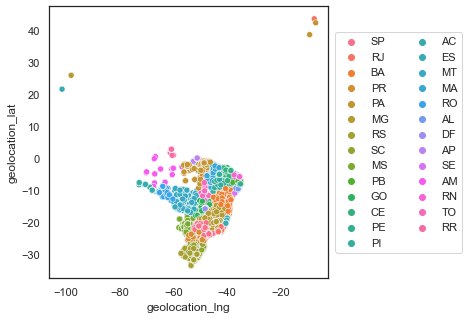

In [15]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=geolocation.sample(50000, random_state=0),
                x='geolocation_lng', y='geolocation_lat', hue='geolocation_state')
plt.legend(bbox_to_anchor=(1.5, 0.5), loc=5, ncol=2)


#### Geolocation : qualit√© des donn√©es

- les 'states' sont 100% remplies; il y a 27 unit√©s f√©d√©ratives au br√©sil
- les 'city' ne sont pas toujours des vraies villes
- les latitudes ne sont pas toujours en br√©sil ([5¬∞16'20" Nord √† 33¬∞44'32" Sud de latitude](https://fr.wikipedia.org/wiki/G%C3%A9ographie_du_Br%C3%A9sil#Situation_et_%C3%A9tendue))
- les longitudes ne sont pas toujours en br√©sil ([34¬∞47'30" Ouest √† 73¬∞59'32" Ouest de longitude](https://fr.wikipedia.org/wiki/G%C3%A9ographie_du_Br%C3%A9sil#Situation_et_%C3%A9tendue))
- Ce n'est pas clair pourquoi il y a environ 75 (lat,lng) pour chaque zip code - les (lat,lng) des adresses dans chaque zip ?


#### Geolocations hors br√©sil


In [16]:
print('trop au nord ', geolocation[geolocation['geolocation_lat'] > 5.3].shape)
print('trop au sud ',
      geolocation[geolocation['geolocation_lat'] < -33.75].shape)
print("trop √† l'est",
      geolocation[geolocation['geolocation_lng'] > -34.7].shape)
print("trop √† l'ouest",
      geolocation[geolocation['geolocation_lng'] < -74].shape)

mask_lat = (geolocation['geolocation_lat'] > 5.3) | (
    geolocation['geolocation_lat'] < -33.75)
mask_lng = (geolocation['geolocation_lng'] > -
            34.7) | (geolocation['geolocation_lng'] < -74)
hors_bresil = geolocation[mask_lat | mask_lng]
hors_bresil.shape


trop au nord  (26, 5)
trop au sud  (5, 5)
trop √† l'est (33, 5)
trop √† l'ouest (4, 5)


(42, 5)

Eliminer les outliers de (lat,lng) dans les zipcodes


Text(0.5, 1.0, 'Latitudes et longitudes de zip_code_prefix 22210 (Flamengo, Rio de Janeiro)')

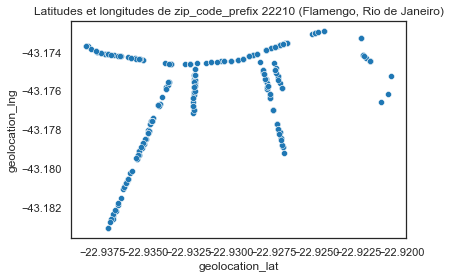

In [17]:
flamengo = geolocation[geolocation['geolocation_zip_code_prefix'] == 22210]
sns.scatterplot(data=flamengo, x='geolocation_lat', y='geolocation_lng')
plt.title(
    'Latitudes et longitudes de zip_code_prefix 22210 (Flamengo, Rio de Janeiro)')


#### Cr√©er geolocations uniques des zipcodes

Les donn√©es sont anonymis√©es, donc on prend la m√©diane des (lat,lng) pour chaque zip code, apr√®s avoir √©limin√© les 42 registres avec coordon√©es hors bresil (la m√®diane doit √©liminer l'effet de quelques erreurs de lat,lng pour chaque zipcode)


In [18]:
geoloc: pd.DataFrame = (geolocation
                        .drop(hors_bresil.index)
                        .dropna(subset=['geolocation_lat', 'geolocation_lng'])
                        .groupby(['geolocation_zip_code_prefix', 'geolocation_state'])
                        .agg({'geolocation_lat': 'median', 'geolocation_lng': 'median', 'geolocation_city': 'count'})
                        .rename(columns={'geolocation_city': 'count'})
                        .reset_index())
print(geoloc.shape)
decrire_dataframe(geoloc)


(19018, 5)
19018 registres


% manquantes  unique    dtype    min    max  \
column                                                                     
geolocation_zip_code_prefix          0.00   19010    int64   1001  99990   
geolocation_state                    0.00      27   object     AC     TO   
geolocation_lat                      0.00   18993  float64 -33.69   4.48   
geolocation_lng                      0.00   18993  float64 -72.91 -34.80   
count                                0.00     483    int64      1   1146   

                                 std  
column                                
geolocation_zip_code_prefix 30904.84  
geolocation_state                nan  
geolocation_lat                 7.24  
geolocation_lng                 5.20  
count                          72.06

Il y a 8 zipcodes avec duplicates :


In [19]:
geoloc_dups = geoloc[geoloc.duplicated(
    keep=False, subset=['geolocation_zip_code_prefix'])]
geoloc_dups.head(8)


geolocation_zip_code_prefix geolocation_state  geolocation_lat  \
367                          2116                RN           -23.52   
368                          2116                SP           -23.52   
1669                         4011                AC           -23.58   
1670                         4011                SP           -23.58   
6507                        21550                AC           -22.86   
6508                        21550                RJ           -22.86   
6698                        23056                AC           -22.92   
6699                        23056                RJ           -22.92   

      geolocation_lng  count  
367            -46.58      1  
368            -46.58     12  
1669           -46.65      1  
1670           -46.64    178  
6507           -43.35      1  
6508           -43.35    170  
6698           -43.61      1  
6699           -43.61     60

Supprime les zipcodes duplicates ou il y a moins d'entr√©es


In [20]:
geoloc = geoloc.sort_values(by='count', ascending=False).drop_duplicates(
    keep='first', subset='geolocation_zip_code_prefix')
decrire_dataframe(geoloc)


19010 registres


% manquantes  unique    dtype    min    max  \
column                                                                     
geolocation_zip_code_prefix          0.00   19010    int64   1001  99990   
geolocation_state                    0.00      27   object     AC     TO   
geolocation_lat                      0.00   18985  float64 -33.69   4.48   
geolocation_lng                      0.00   18985  float64 -72.91 -34.80   
count                                0.00     483    int64      1   1146   

                                 std  
column                                
geolocation_zip_code_prefix 30903.69  
geolocation_state                nan  
geolocation_lat                 7.24  
geolocation_lng                 5.20  
count                          72.06

Text(0.5, 1.0, 'Localisation des zipcodes')

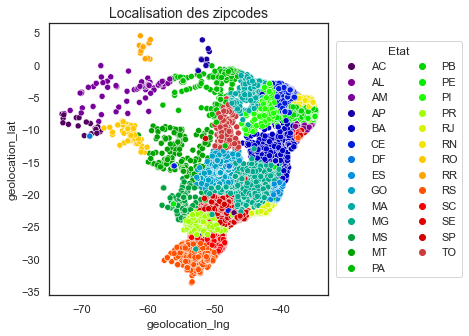

In [21]:
hue_order = sorted(geoloc['geolocation_state'].unique())
plt.figure(figsize=(5, 5))
sns.scatterplot(data=geoloc, x='geolocation_lng', y='geolocation_lat',
                hue='geolocation_state', hue_order=hue_order, palette='nipy_spectral')
plt.legend(title='Etat', bbox_to_anchor=(1.5, 0.5), loc=5, ncol=2)
plt.title('Localisation des zipcodes', fontsize=14)


Les zipcodes correspond √† toutes les √©tats f√©derals du Br√©sil. Quelques zipcodes sont attribu√©es au mauvais √©tat ou au mauvais latitude, longitude.


### Order items


In [22]:
decrire_dataframe(order_items)


112650 registres


% manquantes  unique    dtype  \
column                                               
order_id                     0.00   98666   object   
order_item_id                0.00      21    int64   
product_id                   0.00   32951   object   
seller_id                    0.00    3095   object   
shipping_limit_date          0.00   93318   object   
price                        0.00    5968  float64   
freight_value                0.00    6999  float64   

                                                  min  \
column                                                  
order_id             00010242fe8c5a6d1ba2dd792cb16214   
order_item_id                                       1   
product_id           00066f42aeeb9f3007548bb9d3f33c38   
seller_id            0015a82c2db000af6aaaf3ae2ecb0532   
shipping_limit_date               2016-09-19 00:15:34   
price                                            0.85   
freight_value                                    0.00   

                                                  max    std  
column                                                        
order_id             fffe41c64501cc87c801fd61db3f6244    nan  
order_item_id                                      21   0.71  
product_id           fffe9eeff12fcbd74a2f2b007dde0c58    nan  
seller_id            ffff564a4f9085cd26170f4732393726    nan  
shipping_limit_date               2020-04-09 22:35:08    nan  
price                                         6735.00 183.63  
freight_value                                  409.68  15.81

In [23]:
order_items.duplicated(subset=['order_id', 'order_item_id']).sum()


0

#### Qualit√© des donn√©es order items

- Aucun donn√©e manquantes
- pas de dupliqu√©es
- prix entre 0.85 et 6735
- Donn√©es atomiques - lien entre client et vendeur


### Order payments


In [24]:
decrire_dataframe(order_payments)


103886 registres


% manquantes  unique    dtype  \
column                                                
order_id                      0.00   99440   object   
payment_sequential            0.00      29    int64   
payment_type                  0.00       5   object   
payment_installments          0.00      24    int64   
payment_value                 0.00   29077  float64   

                                                   min  \
column                                                   
order_id              00010242fe8c5a6d1ba2dd792cb16214   
payment_sequential                                   1   
payment_type                                    boleto   
payment_installments                                 0   
payment_value                                     0.00   

                                                   max    std  
column                                                         
order_id              fffe41c64501cc87c801fd61db3f6244    nan  
payment_sequential                                  29   0.71  
payment_type                                   voucher    nan  
payment_installments                                24   2.69  
payment_value                                 13664.08 217.49

In [25]:
# combien de payments de zero valeur
len(order_payments[order_payments['payment_value'] == 0])


9

In [26]:
order_payments.groupby('order_id').agg(
    {'payment_type': set}).astype(str).value_counts()


payment_type                 
{'credit_card'}                  74259
{'boleto'}                       19784
{'voucher', 'credit_card'}        2245
{'voucher'}                       1621
{'debit_card'}                    1527
{'not_defined'}                      3
{'debit_card', 'credit_card'}        1
dtype: int64

In [27]:
order_payments.groupby('payment_type').agg(
    {'payment_value': sum}).sort_values(by='payment_value', ascending=False)


payment_value
payment_type               
credit_card     12542084.19
boleto           2869361.27
voucher           379436.87
debit_card        217989.79
not_defined            0.00

#### Qualit√© des donn√©es order payments

- aucune donn√©e manquante
- pas clair quand le payment a √©t√© effectu√© (si 8 installements, pay√© en 8 fois, un fois par mois?)
- besoin d'aggreger payment_value pour savoir si c'est √©gal au valeur d'achat


### Order reviews


In [28]:
decrire_dataframe(order_reviews)


99224 registres


% manquantes  unique   dtype  \
column                                                  
review_id                        0.00   98410  object   
order_id                         0.00   98673  object   
review_score                     0.00       5   int64   
review_comment_title            88.34    4527  object   
review_comment_message          58.70   36159  object   
review_creation_date             0.00     636  object   
review_answer_timestamp          0.00   98248  object   

                                                      min  \
column                                                      
review_id                0001239bc1de2e33cb583967c2ca4c67   
order_id                 00010242fe8c5a6d1ba2dd792cb16214   
review_score                                            1   
review_comment_title                                  NaN   
review_comment_message                                NaN   
review_creation_date                  2016-10-02 00:00:00   
review_answer_timestamp               2016-10-07 18:32:28   

                                                      max  std  
column                                                          
review_id                fffefe7a48d22f7b32046421062219d1  nan  
order_id                 fffe41c64501cc87c801fd61db3f6244  nan  
review_score                                            5 1.35  
review_comment_title                                  NaN  nan  
review_comment_message                                NaN  nan  
review_creation_date                  2018-08-31 00:00:00  nan  
review_answer_timestamp               2018-10-29 12:27:35  nan

In [29]:
order_reviews.groupby('order_id').agg(
    {'review_id': 'count'}).astype(str).value_counts()


review_id
1            98126
2              543
3                4
dtype: int64

Text(0.5, 1.0, 'Distribution du score des revues')

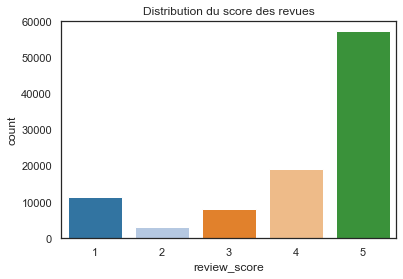

In [30]:
sns.countplot(data=order_reviews, x='review_score')
plt.title('Distribution du score des revues')


In [31]:
order_reviews[order_reviews['review_comment_title'].notnull()].head()


review_id                          order_id  \
9   8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
15  3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
19  373cbeecea8286a2b66c97b1b157ec46  583174fbe37d3d5f0d6661be3aad1786   
22  d21bbc789670eab777d27372ab9094cc  4fc44d78867142c627497b60a7e0228a   
34  c92cdd7dd544a01aa35137f901669cdf  37e7875cdce5a9e5b3a692971f370151   

    review_score     review_comment_title  \
9              4                recomendo   
15             5          Super recomendo   
19             1  N√£o chegou meu produto    
22             5                    √ìtimo   
34             4               Muito bom.   

                                                                                                                                                            review_comment_message  \
9   aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que √© o mesmo aparelho   
15                                                                                                                        Vendedor confi√°vel, produto ok e entrega antes do prazo.   
19                                                                                                                                                                         P√©ssimo   
22                                                                                                                                                                    Loja nota 10   
34                                                                Recebi exatamente o que esperava. As demais encomendas de outros vendedores atrasaram, mas esta chegou no prazo.   

   review_creation_date review_answer_timestamp  
9   2018-05-22 00:00:00     2018-05-23 16:45:47  
15  2018-05-23 00:00:00     2018-05-24 03:00:01  
19  2018-08-15 00:00:00     2018-08-15 04:10:37  
22  2018-07-10 00:00:00     2018-07-11 14:10:25  
34  2018-06-07 00:00:00     2018-06-09 18:44:02

#### Qualit√© des donn√©es de 'review score':

- 98673 unique order_id (compar√© avec 98666 unique order_id dans order_items)
- toutes les commandes on une score (aucune donn√©es manquantes dans colonne score)
- jusqu'√† 3 revues par commande, mais moins de 0.5% des commandes ont plus d'un revue
- environ 40% des commandes contient un revue, seulement 11% contient un titre

Dans le perimetre de ce projet (segmentation des clients), on retient seulement le score pour chaque commande, et le nombre de reviews √©crit.

- il peut √™tre int√©ressant de faire du NLP sur les commentaires client, pour segmenter entre satisfait et pas satisfait, mais d'abord on voit si le score est suffisant.


### Orders (commandes)


In [32]:
decrire_dataframe(orders)


99441 registres


% manquantes  unique   dtype  min  max  std
column                                                                    
order_id                               0.00   99441  object  nan  nan  nan
customer_id                            0.00   99441  object  nan  nan  nan
order_status                           0.00       8  object  nan  nan  nan
order_purchase_timestamp               0.00   98875  object  nan  nan  nan
order_approved_at                      0.16   90733  object  nan  nan  nan
order_delivered_carrier_date           1.79   81018  object  nan  nan  nan
order_delivered_customer_date          2.98   95664  object  nan  nan  nan
order_estimated_delivery_date          0.00     459  object  nan  nan  nan

In [33]:
orders['order_status'].value_counts()


delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [34]:
orders_sans_items = orders[~orders['order_id'].isin(order_items['order_id'])]
print(orders_sans_items.shape)
print(orders_sans_items['order_status'].value_counts())


(775, 8)
unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64


In [35]:
orders_sans_review = orders[~orders['order_id'].isin(
    order_reviews['order_id'])]
print(orders_sans_review.shape)
print(orders_sans_review['order_status'].value_counts())


(768, 8)
delivered      646
shipped         75
canceled        20
unavailable     14
processing       6
invoiced         5
created          2
Name: order_status, dtype: int64


In [36]:
orders[orders['order_status'] != 'delivered'].head()


order_id                       customer_id  \
6    136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44   ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103  0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128  15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
154  6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   

    order_status order_purchase_timestamp    order_approved_at  \
6       invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
44       shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
103     invoiced      2018-08-03 17:44:42  2018-08-07 06:15:14   
128   processing      2017-09-03 14:22:03  2017-09-03 14:30:09   
154      shipped      2018-01-10 11:33:07  2018-01-11 02:32:30   

    order_delivered_carrier_date order_delivered_customer_date  \
6                            NaN                           NaN   
44           2018-06-05 14:32:00                           NaN   
103                          NaN                           NaN   
128                          NaN                           NaN   
154          2018-01-11 19:39:23                           NaN   

    order_estimated_delivery_date  
6             2017-05-09 00:00:00  
44            2018-06-28 00:00:00  
103           2018-08-21 00:00:00  
128           2017-10-03 00:00:00  
154           2018-02-07 00:00:00

In [37]:
decrire_dataframe(orders[orders['order_status'] == 'delivered'])


96478 registres


% manquantes  unique   dtype  min  max  std
column                                                                    
order_id                               0.00   96478  object  nan  nan  nan
customer_id                            0.00   96478  object  nan  nan  nan
order_status                           0.00       1  object  nan  nan  nan
order_purchase_timestamp               0.00   95956  object  nan  nan  nan
order_approved_at                      0.01   88274  object  nan  nan  nan
order_delivered_carrier_date           0.00   80106  object  nan  nan  nan
order_delivered_customer_date          0.01   95658  object  nan  nan  nan
order_estimated_delivery_date          0.00     445  object  nan  nan  nan

#### Qualit√© de donn√©es des commandes

- autant de clients uniques que commandes uniques que registres (pas de dupliques)
- aucune donn√©es manquantes pour les commandes livr√©s
- pour les commandes pas livr√©s, les donn√©es manquantes sont expliqu√©s par le non-livraison

- les produits non-livr√©s seront plus complexe √† analyser, car beaucoup non pas d'items associ√©s (aucun id√©e de ceux que le client a command√©), et beaucoup non pas des reviews associ√©s (aucun id√©e de la satisfaction de la client)


### Products (et product category names)


In [38]:
decrire_dataframe(products)


32951 registres


% manquantes  unique    dtype  \
column                                                      
product_id                          0.00   32951   object   
product_category_name               1.85      73   object   
product_name_lenght                 1.85      66  float64   
product_description_lenght          1.85    2960  float64   
product_photos_qty                  1.85      19  float64   
product_weight_g                    0.01    2204  float64   
product_length_cm                   0.01      99  float64   
product_height_cm                   0.01     102  float64   
product_width_cm                    0.01      95  float64   

                                                         min  \
column                                                         
product_id                  00066f42aeeb9f3007548bb9d3f33c38   
product_category_name                                    NaN   
product_name_lenght                                     5.00   
product_description_lenght                              4.00   
product_photos_qty                                      1.00   
product_weight_g                                        0.00   
product_length_cm                                       7.00   
product_height_cm                                       2.00   
product_width_cm                                        6.00   

                                                         max     std  
column                                                                
product_id                  fffe9eeff12fcbd74a2f2b007dde0c58     nan  
product_category_name                                    NaN     nan  
product_name_lenght                                    76.00   10.25  
product_description_lenght                           3992.00  635.12  
product_photos_qty                                     20.00    1.74  
product_weight_g                                    40425.00 4282.04  
product_length_cm                                     105.00   16.91  
product_height_cm                                     105.00   13.64  
product_width_cm                                      118.00   12.08

In [39]:
products[products['product_category_name'].isna()].head()


product_id product_category_name  \
105  a41e356c76fab66334f36de622ecbd3a                   NaN   
128  d8dee61c2034d6d075997acef1870e9b                   NaN   
145  56139431d72cd51f19eb9f7dae4d1617                   NaN   
154  46b48281eb6d663ced748f324108c733                   NaN   
197  5fb61f482620cb672f5e586bb132eae9                   NaN   

     product_name_lenght  product_description_lenght  product_photos_qty  \
105                  nan                         nan                 nan   
128                  nan                         nan                 nan   
145                  nan                         nan                 nan   
154                  nan                         nan                 nan   
197                  nan                         nan                 nan   

     product_weight_g  product_length_cm  product_height_cm  product_width_cm  
105            650.00              17.00              14.00             12.00  
128            300.00              16.00               7.00             20.00  
145            200.00              20.00              20.00             20.00  
154          18500.00              41.00              30.00             41.00  
197            300.00              35.00               7.00             12.00

In [40]:
products['product_category_name'].value_counts(
    normalize=True).cumsum().head()*100


cama_mesa_banho          9.37
esporte_lazer           18.23
moveis_decoracao        26.45
beleza_saude            34.00
utilidades_domesticas   41.22
Name: product_category_name, dtype: float64

In [41]:
products['product_category_name'].value_counts(normalize=True).tail()*100


fashion_roupa_infanto_juvenil   0.02
casa_conforto_2                 0.02
pc_gamer                        0.01
seguros_e_servicos              0.01
cds_dvds_musicais               0.00
Name: product_category_name, dtype: float64

#### Qualit√© des donn√©es 'products'

- 2% des produits n'ont pas de cat√©gorie ni description
- 73 cat√©gories differents, 5 cat√©gories contient 40% des produits
- peut-√™tre vaut le coup de cluster les cat√©gories des produits?
- besoin de traduire les cat√©gories de portugues en anglais, par exemple.
- plus de traitement apr√©s √©limination des produits non-vendus


### Sellers


In [42]:
decrire_dataframe(sellers)


3095 registres


% manquantes  unique   dtype  \
column                                                 
seller_id                       0.00    3095  object   
seller_zip_code_prefix          0.00    2246   int64   
seller_city                     0.00     611  object   
seller_state                    0.00      23  object   

                                                     min  \
column                                                     
seller_id               0015a82c2db000af6aaaf3ae2ecb0532   
seller_zip_code_prefix                              1001   
seller_city                                     04482255   
seller_state                                          AC   

                                                     max      std  
column                                                             
seller_id               ffff564a4f9085cd26170f4732393726      nan  
seller_zip_code_prefix                             99730 32713.45  
seller_city                                        xaxim      nan  
seller_state                                          SP      nan

#### Qualit√© de donn√©es 'sellers'

- aucune donn√©es manquantes
- la ville n'est pas toujours une vraie ville
- environ un vendeur pour chaque 33 commandes (3095 vendeurs, 99000 commandes)
- besoin de merge avec geolocation pour savoir la localisation du vendeur


## 2.4 Nettoyage des donn√©es

Le but est de pouvoir aggr√©ger plusieurs indicateurs / kpi sur chaque `customer_unique_id`

On commence par rassembler les donn√©es de plusieurs tables

- customers_geo = customers + geolocation
- sellers_geo = sellers + geolocation
- products_en = products + product_category_names


### Geolocation des clients


In [43]:
geolocal = geoloc[['geolocation_zip_code_prefix',
                   'geolocation_lng', 'geolocation_lat']]
geolocal.columns = ['customer_zip_code_prefix', 'customer_lng', 'customer_lat']
customers_geo = customers.merge(
    geolocal, on='customer_zip_code_prefix', how='left')
customers_geo['customer_id'] = customers_geo['customer_id'].astype('object')
customers_geo.isna().sum()


customer_id                   0
customer_unique_id            0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
customer_lng                279
customer_lat                279
dtype: int64

quelques 'customer_zip_code_prefix' ne sont pas dans geolocalisation


In [44]:
sans_geo = customers_geo[customers_geo['customer_lat'].isnull()]
sans_geo[['customer_state', 'customer_city',
          'customer_zip_code_prefix']].value_counts().head()


customer_state  customer_city  customer_zip_code_prefix
DF              brasilia       70686                       15
                               72005                       13
                               71919                       10
                               73255                        7
                               72300                        6
dtype: int64

#### Imputation des latitudes et longitudes manquantes √† partir des zip_code_prefix

Les clients avec zipcode similaire auront geolocalisation similaire


In [45]:
from sklearn.impute import KNNImputer
impute_cols = ['customer_zip_code_prefix', 'customer_lng', 'customer_lat']
imputer = KNNImputer(n_neighbors=5)
customers_geo[impute_cols] = imputer.fit_transform(customers_geo[impute_cols])
customers_geo.isna().mean()


customer_id                0.00
customer_unique_id         0.00
customer_zip_code_prefix   0.00
customer_city              0.00
customer_state             0.00
customer_lng               0.00
customer_lat               0.00
dtype: float64

Text(0.5, 1.0, 'Localisation des clients - Distrito Federal')

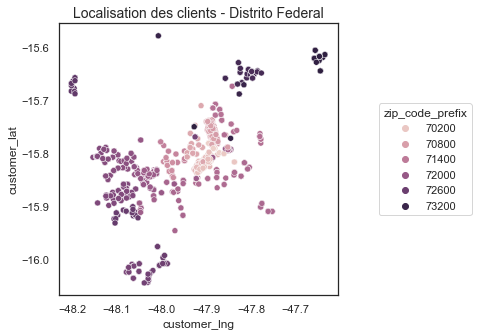

In [46]:
DF = customers_geo[customers_geo['customer_state'] == 'DF']
plt.figure(figsize=(5, 5))
sns.scatterplot(data=DF, x='customer_lng', y='customer_lat',
                hue='customer_zip_code_prefix')
plt.legend(title='zip_code_prefix', bbox_to_anchor=(1.5, 0.5), loc=5)
plt.title('Localisation des clients - Distrito Federal', fontsize=14)


In [47]:
def add_text(ax, x, y, s, **kwargs):
    """Ajouter du texte √† un plot"""
    ax.text(x, y, s, verticalalignment='bottom',
            horizontalalignment='left', transform=ax.transAxes, **kwargs)


Text(0.5, 1.0, 'Localisation des clients')

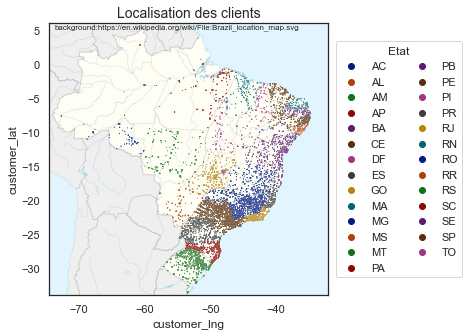

In [48]:
states_order = sorted(list(customers_geo['customer_state'].unique()))
plt.figure(figsize=(5, 5))
img_src = 'https://en.wikipedia.org/wiki/File:Brazil_location_map.svg'
img = plt.imread('Brazil_location_map.svg.png')
ax = sns.scatterplot(data=customers_geo, x='customer_lng', y='customer_lat',
                     hue='customer_state', hue_order=states_order, s=1, palette='dark')
# plt.xlim(-74.5, -32)
# plt.ylim(-34, 6)
ax.imshow(img, extent=[-74.5, -32, -34, 6], aspect='auto', alpha=0.5)
add_text(ax, 0.02, 0.97, s=f'background:{img_src}', fontsize=8)
plt.legend(title='Etat', bbox_to_anchor=(1.5, 0.5), loc=5, ncol=2)
plt.title('Localisation des clients', fontsize=14)


On remarque que les clients sont distribu√©s partout le pays de br√©sil


### Geolocation des vendeurs


In [49]:
print(sellers[['seller_state']].value_counts().head())
geolocal.columns = ['seller_zip_code_prefix', 'seller_lng', 'seller_lat']
sellers_geo = sellers.merge(geolocal, on='seller_zip_code_prefix', how='left')
sellers_sans_geo = sellers_geo['seller_lng'].isna().sum()
print(f'sellers sans geolocalisation : {sellers_sans_geo}')


seller_state
SP              1849
PR               349
MG               244
SC               190
RJ               171
dtype: int64
sellers sans geolocalisation : 7


In [50]:
from sklearn.impute import KNNImputer
impute_cols = ['seller_zip_code_prefix', 'seller_lng', 'seller_lat']
imputer = KNNImputer(n_neighbors=5)
sellers_geo[impute_cols] = imputer.fit_transform(sellers_geo[impute_cols])
# sellers_geo.isna().mean()


Text(0.5, 1.0, 'Localisation des vendeurs')

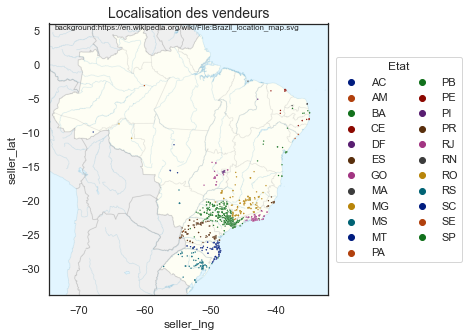

In [51]:

states_order = sorted(list(sellers_geo['seller_state'].unique()))
plt.figure(figsize=(5, 5))
ax = sns.scatterplot(data=sellers_geo, x='seller_lng', y='seller_lat',
                     hue='seller_state', hue_order=states_order, s=2, palette='dark')
ax.imshow(img, extent=[-74.5, -32, -34, 6], aspect='auto', alpha=0.5)
add_text(ax, 0.02, 0.97, s=f'background:{img_src}', fontsize=8)
plt.legend(title='Etat', bbox_to_anchor=(1.5, 0.5), loc=5, ncol=2)
plt.title('Localisation des vendeurs', fontsize=14)


Les vendeurs sont concentr√©s dans les √©tats du sud du br√©sil (Sao Paulo, Parana, Minas Gerais, Santa Catarina, Rio de Janeiro)


### Cat√©gories des produits en anglais


In [52]:
products_en = (products
               .merge(product_category_names, on='product_category_name', how='left')
               .drop(columns=[])
               )
products_en.isna().sum().sort_values(ascending=False)


product_category_name_english    623
product_photos_qty               610
product_description_lenght       610
product_name_lenght              610
product_category_name            610
product_width_cm                   2
product_height_cm                  2
product_length_cm                  2
product_weight_g                   2
product_id                         0
dtype: int64

On traite plus tard les valeurs manquantes seulement pour les produits command√©s.


### Nettoyage de la table 'orders' (commandes qui ne sont pas livr√©s)

Pour segmentation des clients, on veut analyser seulement les commandes livr√©s, car ce qui ne sont pas livr√©s n'auront pas des reviews, et beaucoup des commandes non-livr√©s n'a pas d'items (on ne sait pas ceux qui le client a achet√©)


In [53]:
pd.crosstab(orders['order_status'],
            orders['order_delivered_customer_date'].notnull())


order_delivered_customer_date  False  True 
order_status                               
approved                           2      0
canceled                         619      6
created                            5      0
delivered                          8  96470
invoiced                         314      0
processing                       301      0
shipped                         1107      0
unavailable                      609      0

In [54]:
order_scores = pd.merge(orders, order_reviews, on='order_id', how='inner')

order_scores.head()


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                         review_id  \
0           2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
1           2018-08-13 00:00:00  8d5266042046a06655c8db133d120ba5   
2           2018-09-04 00:00:00  e73b67b67587f7644d5bd1a52deb1b01   
3           2017-12-15 00:00:00  359d03e676b3c069f62cadba8dd3f6e8   
4           2018-02-26 00:00:00  e50934924e227544ba8246aeb3770dd4   

   review_score review_comment_title  \
0             4                  NaN   
1             4     Muito boa a loja   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                                                                                                                                                       review_comment_message  \
0  N√£o testei o produto ainda, mas ele veio correto e em boas condi√ß√µes. Apenas a caixa que veio bem amassada e danificada, o que ficar√° chato, pois se trata de um presente.   
1                                                                                                                                                        Muito bom o produto.   
2                                                                                                                                                                         NaN   
3                                                                   O produto foi exatamente o que eu esperava e estava descrito no site e chegou bem antes da data prevista.   
4                                                                                                                                                                         NaN   

  review_creation_date review_answer_timestamp  
0  2017-10-11 00:00:00     2017-10-12 03:43:48  
1  2018-08-08 00:00:00     2018-08-08 18:37:50  
2  2018-08-18 00:00:00     2018-08-22 19:07:58  
3  2017-12-03 00:00:00     2017-12-05 19:21:58  
4  2018-02-17 00:00:00     2018-02-18 13:02:51

In [55]:
scores = pd.crosstab(order_scores['order_status'],
                     order_scores['review_score'])
scores


review_score     1     2     3      4      5
order_status                                
approved         1     0     0      1      0
canceled       422    44    48     26     69
created          2     0     0      0      1
delivered     9406  2941  7961  18987  57066
invoiced       230    26    16     15     26
processing     256    18     9      6      7
shipped        644    79   110     87    123
unavailable    463    43    35     20     36

Text(0.5, 0.98, 'Distribution de scores ')

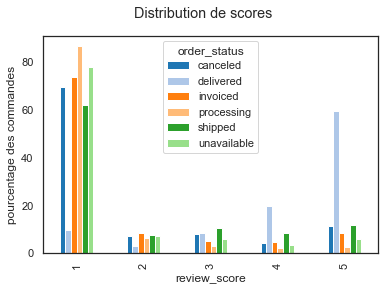

In [56]:
scores.drop(['approved', 'created']).apply(lambda row: 100*row /
                                           row.sum(), axis=1).T.plot(kind='bar', stacked=False)
plt.ylabel('pourcentage des commandes')
plt.suptitle('Distribution de scores ')


Text(0.5, 1.0, 'Review score en fonction du status de la commande')

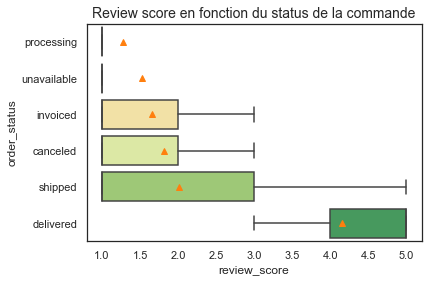

In [57]:
# ignore categories avec 5 ou moins registres
order_scores = order_scores[~order_scores['order_status'].isin(
    ['created', 'approved'])]
box_order = order_scores.groupby('order_status')[
    'review_score'].agg('mean').sort_values().index
sns.boxplot(data=order_scores, x='review_score', y='order_status', order=box_order,
            showmeans=True, showfliers=False, palette=sns.color_palette('RdYlGn'))
plt.title('Review score en fonction du status de la commande', fontsize=14)


Tant que les produits ne sont pas livr√©s, les review_score sont bas

Il se peut que les clients qui annulent leur commande, ou qui restent en attent de livraison donnera un note plus bas jusqu'√† ce que la commande arrive

#### Supprime les commandes pas encore livr√©s

- Si on segment sur les commandes pas livr√©s, on ne peut pas √™tre sur que c'est representative, car les scores se modifie apr√®s livraison.


In [58]:
orders_delivered = orders[(orders['order_status'] == 'delivered') &
                          (orders['order_delivered_customer_date'].notnull())]
print(orders_delivered.shape)


(96470, 8)


### Aggr√©ger order_review par order_id

On utilisera seulement le score moyenne par commande.

Le perimetre de ce projet ne donne pas le temps pour analyser les texts des commentaires, qui peuvent nuancer les segments des clients.

La pr√©sence des commentaires/titres peut √™tre util pour distinguer les clients

- Les clients qui laisse une commentaire sont peut-√™tre plus engag√© que ceux qui ont un simple note
- Ceux qui donne une titre au revue, encore plus ?
- on remplit les valeurs manquantes pour message et title avec '' pour concatener les commentaires


In [59]:
for col in ['review_comment_message', 'review_comment_title']:
    order_reviews[col] = order_reviews[col].fillna('')

order_reviews['review_nb_comments'] = (
    order_reviews['review_comment_message'] != '').astype(float)
order_reviews['review_nb_title'] = (
    order_reviews['review_comment_title'] != '').astype(float)


def agg_join(x): return '; '.join(x)


order_reviews_agg = order_reviews.groupby('order_id').agg({
    'review_score': 'mean',
    'review_nb_comments': 'sum',
    'review_nb_title': 'sum',
    'review_comment_message': agg_join,
    'review_comment_title': agg_join,
}).reset_index()

order_reviews_agg.sort_values(by='review_nb_title', ascending=False).head()


order_id  review_score  review_nb_comments  \
43650  7144ca093cbdecfdfc3e76d49da6ffb9          2.50                2.00   
50980  84aa61a900410cfe26b57337d376a1ae          5.00                2.00   
43683  715b8576b74d53796bcbb107a201eb55          5.00                2.00   
2040   0544030711e50ec2cb6c15764d22891a          2.50                1.00   
74718  c1deab56eafcb4bec7703bbe7bd25137          3.00                2.00   

       review_nb_title  \
43650             2.00   
50980             2.00   
43683             2.00   
2040              2.00   
74718             2.00   

                                                                                                                                                                                          review_comment_message  \
43650                                                                           Est√° faltando receber um produto: Pulseira Masculina de Couro Caveira Couro Leg√≠timo + Pedra Preto 20 ; Recebi o produto errado.   
50980                                                                                                                                                                                     Recomendo!; Recomendo!   
43683             Produto lindo,adorei!!; Fiquei muito satisfeita com o produto,fiz um pedido especial para entrega ,e eles acolheram este pedido,que pra mim fez toda a diferen√ßa.Muito feliz obrigada nota 10.   
2040   ; Comprei duas v√°lvulas solen√≥ides iguais. Paguei o mesmo produto com quantidade 2 (dois). As v√°lvulas s√£o iguais, mas as roscas s√£o diferentes. Uma √© BSP, com passo igual a NPT, a outra tem passo maio   
74718                                                                                                                                                      produto fora da minha expectativa ; recomendo a loja    

                      review_comment_title  
43650          Sem recomenda√ß√£o; Recomendo  
50980                         √ìtima; √ìtima  
43683     super recomendo; super recomendo  
2040   N√£o quero avaliar; √â muito confusa.  
74718               produto horrivel; bom

### Aggr√©ger order_payments par order_id

Pour eviter de cr√©er plusieurs lignes sur join, il faut seulement un ligne par commande dans order_payments.

Les indicateurs d'interesse sont:

- payment_type
- payment_value
- payment_installments


In [60]:
order_payment_dups = (order_payments[order_payments.duplicated(subset=['order_id'], keep=False)]
                      .sort_values(by='order_id'))
print(order_payment_dups.shape)
order_payment_dups.head(2)


(7407, 5)


order_id  payment_sequential payment_type  \
80856  0016dfedd97fc2950e388d2971d718c7                   2      voucher   
89575  0016dfedd97fc2950e388d2971d718c7                   1  credit_card   

       payment_installments  payment_value  
80856                     1          17.92  
89575                     5          52.63

On peut considerer :

- que les 'voucher' sont pay√©s immediatement (installment=0); donc
- payment_installments = max(payment_installments) pour chaque commande

Pour pouvoir fusionner avec les autres tables, on r√©duit cette table √† un ligne par commande (cr√©ation d'une nouvelle 'order_payments_agg'):


In [61]:
order_payments_piv = (pd.pivot_table(order_payments, index=['order_id'],
                                     columns='payment_type', values='payment_value', fill_value=0,
                                     aggfunc='sum', margins='row', margins_name="payment_value")
                      .reset_index().set_index('order_id').drop('payment_value', axis=0))
print(order_payments_piv.shape)


def agg_set(x): return ', '.join(sorted(list(set(x))))


order_method = (order_payments.groupby('order_id').agg(
    {'payment_installments': max, 'payment_type': agg_set}))
order_method['payment_type'] = order_method['payment_type'].astype(str)
print(order_method.shape)

order_payments_agg = pd.merge(
    order_method, order_payments_piv, on='order_id', how='inner')
order_payments_agg[order_payments_agg['voucher'] > 0].tail()


(99440, 6)
(99440, 2)


payment_installments          payment_type  \
order_id                                                                       
ff20ee702706d9e407a34de9fe2ff768                     6  credit_card, voucher   
ff7400d904161b62b6e830b3988f5cbd                     1  credit_card, voucher   
ff978de32e717acd3b5abe1fb069d2b6                     1               voucher   
ffa1dd97810de91a03abd7bd76d2fed1                     1  credit_card, voucher   
ffa39020fe7c8a3e907320e1bec4b985                     1  credit_card, voucher   

                                  boleto  credit_card  debit_card  \
order_id                                                            
ff20ee702706d9e407a34de9fe2ff768    0.00       132.10        0.00   
ff7400d904161b62b6e830b3988f5cbd    0.00        54.96        0.00   
ff978de32e717acd3b5abe1fb069d2b6    0.00         0.00        0.00   
ffa1dd97810de91a03abd7bd76d2fed1    0.00        36.58        0.00   
ffa39020fe7c8a3e907320e1bec4b985    0.00         7.13        0.00   

                                  not_defined  voucher  payment_value  
order_id                                                               
ff20ee702706d9e407a34de9fe2ff768            0    50.00         182.10  
ff7400d904161b62b6e830b3988f5cbd            0   100.00         154.96  
ff978de32e717acd3b5abe1fb069d2b6            0    49.14          49.14  
ffa1dd97810de91a03abd7bd76d2fed1            0   418.73         455.31  
ffa39020fe7c8a3e907320e1bec4b985            0    64.01          71.14

In [62]:
order_payments_agg['payment_type'].value_counts()


credit_card                74259
boleto                     19784
credit_card, voucher        2245
voucher                     1621
debit_card                  1527
not_defined                    3
credit_card, debit_card        1
Name: payment_type, dtype: int64

In [63]:
decrire_dataframe(order_payments_agg)


99440 registres


% manquantes  unique    dtype     min      max    std
column                                                                     
payment_installments          0.00      24    int64       0       24   2.72
payment_type                  0.00       7   object  boleto  voucher    nan
boleto                        0.00   10542  float64    0.00  7274.88 111.48
credit_card                   0.00   25430  float64    0.00 13664.08 207.84
debit_card                    0.00    1382  float64    0.00  4445.50  35.16
not_defined                   0.00       1    int64       0        0   0.00
voucher                       0.00    2846  float64    0.00  3184.34  34.11
payment_value                 0.00   28029  float64    0.00 13664.08 221.95

### Convertir zip_codes en object

Maintenant que les latitudes et longitudes sont remplis, on peut convertir zip_code en object


In [64]:
customers_geo['customer_zip_code_prefix'] = customers_geo['customer_zip_code_prefix'].astype(
    object)
sellers_geo['seller_zip_code_prefix'] = sellers_geo['seller_zip_code_prefix'].astype(
    object)


## 2.5 Fusionne des tables

On peut cr√©er des indicateurs individuellement, par des joins necessaire pour chaque indicateur. Pourtant, il sera dificile de verifier que les indicateurs font r√©f√©rence aux m√™mes clients.

Avec la quantit√© de donn√©es present, on peut fusionner (merge) les donn√©es de toutes les tables, pour ensuite pouvoir g√©nerer les indicateurs n√©cessaire pour segmentation.

Les nouvelles tables sont:

- **commandes** - pour pouvoir aggr√©ger order dates, payment types, reviews par unique customer_id
- **commande_items** - pour aggr√©ger cat√©gories de produit, sellers, distances par unique customer_id
- **clients** - accumulation des indicateurs par unique_customer_id, pour faire la segmentation des clients


### Cr√©ation de la table 'commandes'

La fusion d'information sur les commandes (sans detailles des items de chaque commande) permet de faire un analyse RFM (Recency Frequency MonetaryValue), par exemple.


In [65]:
print(f'customers_geo.shape : {customers_geo.shape}')
print(f'orders_delivered.shape : {orders_delivered.shape}')
print(f'order_reviews_agg.shape : {order_reviews_agg.shape}')
print(f'order_payments_agg.shape : {order_payments_agg.shape}')
commandes = (orders_delivered
             .merge(order_reviews_agg, on='order_id', how='inner')
             .merge(order_payments_agg, on='order_id', how='left')
             .merge(customers_geo, on='customer_id', how='left')
             )

print(f'commandes.shape : {commandes.shape}')
pd.set_option('display.max_rows', 30)
decrire_dataframe(commandes).sort_values(by='% manquantes', ascending=False)


customers_geo.shape : (99441, 7)
orders_delivered.shape : (96470, 8)
order_reviews_agg.shape : (98673, 6)
order_payments_agg.shape : (99440, 8)
commandes.shape : (95824, 27)
95824 registres


% manquantes  unique    dtype  \
column                                                         
order_approved_at                      0.01   87719   object   
payment_installments                   0.00      24  float64   
boleto                                 0.00   10242  float64   
order_delivered_carrier_date           0.00   79604   object   
payment_value                          0.00   27403  float64   
voucher                                0.00    2696  float64   
not_defined                            0.00       1  float64   
debit_card                             0.00    1346  float64   
credit_card                            0.00   24860  float64   
payment_type                           0.00       5   object   
customer_lng                           0.00   14798  float64   
customer_state                         0.00      27   object   
customer_city                          0.00    4083   object   
customer_zip_code_prefix               0.00   14869   object   
customer_unique_id                     0.00   92747   object   
order_id                               0.00   95824   object   
customer_id                            0.00   95824   object   
review_comment_title                   0.00    4376   object   
review_comment_message                 0.00   34463   object   
review_nb_title                        0.00       3  float64   
review_nb_comments                     0.00       4  float64   
review_score                           0.00      11  float64   
order_estimated_delivery_date          0.00     445   object   
order_delivered_customer_date          0.00   95016   object   
order_purchase_timestamp               0.00   95309   object   
order_status                           0.00       1   object   
customer_lat                           0.00   14803  float64   

                                                            min  \
column                                                            
order_approved_at                                           NaN   
payment_installments                                       0.00   
boleto                                                     0.00   
order_delivered_carrier_date                                NaN   
payment_value                                              9.59   
voucher                                                    0.00   
not_defined                                                0.00   
debit_card                                                 0.00   
credit_card                                                0.00   
payment_type                                                NaN   
customer_lng                                             -72.67   
customer_state                                               AC   
customer_city                               abadia dos dourados   
customer_zip_code_prefix                                1003.00   
customer_unique_id             0000366f3b9a7992bf8c76cfdf3221e2   
order_id                       00010242fe8c5a6d1ba2dd792cb16214   
customer_id                    00012a2ce6f8dcda20d059ce98491703   
review_comment_title                                              
review_comment_message                                            
review_nb_title                                            0.00   
review_nb_comments                                         0.00   
review_score                                               1.00   
order_estimated_delivery_date               2016-10-04 00:00:00   
order_delivered_customer_date               2016-10-11 13:46:32   
order_purchase_timestamp                    2016-09-15 12:16:38   
order_status                                          delivered   
customer_lat                                             -33.69   

                                                                               max  \
column                                                                               
order_approved_at                                         

#### Commandes - traitement des donn√©es manquantes

La plupart des donn√©es manquantes sont pour les commandes pas livr√©s


In [66]:
rows_missing_data = commandes[commandes.isna().any(axis=1)]
print(len(rows_missing_data))
rows_missing_data.head()


16


order_id                       customer_id  \
5140   e04abd8149ef81b95221e88f6ed9ab6a  2127dc6603ac33544953ef05ec155771   
16014  8a9adc69528e1001fc68dd0aaebbb54a  4c1ccc74e00993733742a3c786dc3c1f   
18390  7013bcfc1c97fe719a7b5e05e61c12db  2941af76d38100e0f8740a374f1a5dc3   
21869  5cf925b116421afa85ee25e99b4c34fb  29c35fc91fc13fb5073c8f30505d860d   
22345  12a95a3c06dbaec84bcfb0e2da5d228a  1e101e0daffaddce8159d25a8e53f2b2   

      order_status order_purchase_timestamp order_approved_at  \
5140     delivered      2017-02-18 14:40:00               NaN   
16014    delivered      2017-02-18 12:45:31               NaN   
18390    delivered      2017-02-18 13:29:47               NaN   
21869    delivered      2017-02-18 16:48:35               NaN   
22345    delivered      2017-02-17 13:05:55               NaN   

      order_delivered_carrier_date order_delivered_customer_date  \
5140           2017-02-23 12:04:47           2017-03-01 13:25:33   
16014          2017-02-23 09:01:52           2017-03-02 10:05:06   
18390          2017-02-22 16:25:25           2017-03-01 08:07:38   
21869          2017-02-22 11:23:10           2017-03-09 07:28:47   
22345          2017-02-22 11:23:11           2017-03-02 11:09:19   

      order_estimated_delivery_date  review_score  review_nb_comments  \
5140            2017-03-17 00:00:00          4.00                1.00   
16014           2017-03-21 00:00:00          5.00                0.00   
18390           2017-03-17 00:00:00          5.00                0.00   
21869           2017-03-31 00:00:00          5.00                0.00   
22345           2017-03-20 00:00:00          5.00                0.00   

       review_nb_title                    review_comment_message  \
5140              0.00  Muita demora, mas, tudo ok.\r\nTerezinha   
16014             0.00                                             
18390             0.00                                             
21869             0.00                                             
22345             0.00                                             

      review_comment_title  payment_installments payment_type  boleto  \
5140                                        1.00       boleto  349.01   
16014                                       1.00       boleto  396.86   
18390                                       1.00       boleto   65.52   
21869                                       1.00       boleto  106.81   
22345                                       1.00       boleto   95.76   

       credit_card  debit_card  not_defined  voucher  payment_value  \
5140          0.00        0.00         0.00     0.00         349.01   
16014         0.00        0.00         0.00     0.00         396.86   
18390         0.00        0.00         0.00     0.00          65.52   
21869         0.00        0.00         0.00     0.00         106.81   
22345         0.00        0.00         0.00     0.00          95.76   

                     customer_unique_id customer_zip_code_prefix  \
5140   8a9a08c7ca8900a200d83cf838a07e0b                  6708.00   
16014  91efb7fcabc17925099dced52435837f                 93548.00   
18390  e1f01a1bd6485e58ad3c769a5427d8a8                  8230.00   
21869  7e1a5ca61b572d76b64b6688b9f96473                 62700.00   
22345  c8822fce1d0bfa7ddf0da24fff947172                 27945.00   

       customer_city customer_state  customer_lng  customer_lat  
5140           cotia             SP        -46.85        -23.59  
16014  novo hamburgo             RS        -51.12        -29.69  
18390      sao paulo             SP        -46.45        -23.52  
21869        caninde             CE        -39.31         -4.36  
22345          macae             RJ        -41.80        -22.37

#### Supprime les 16 registres avec donn√©es manquantes


In [67]:
commandes = commandes.dropna()


#### Convertir les colonnes datetime


In [68]:
date_cols = ['order_purchase_timestamp',
             'order_approved_at', 'order_delivered_carrier_date',
             'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in date_cols:
    commandes[col] = pd.to_datetime(commandes[col], errors='coerce')

commandes.select_dtypes(exclude='number').info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 95808 entries, 0 to 95823
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95808 non-null  object        
 1   customer_id                    95808 non-null  object        
 2   order_status                   95808 non-null  object        
 3   order_purchase_timestamp       95808 non-null  datetime64[ns]
 4   order_approved_at              95808 non-null  datetime64[ns]
 5   order_delivered_carrier_date   95808 non-null  datetime64[ns]
 6   order_delivered_customer_date  95808 non-null  datetime64[ns]
 7   order_estimated_delivery_date  95808 non-null  datetime64[ns]
 8   review_comment_message         95808 non-null  object        
 9   review_comment_title           95808 non-null  object        
 10  payment_type                   95808 non-null  object        
 11  customer_unique

### Cr√©ation de la table 'commande*items' (\_items command√©s*)

On fusionne la table des commandes avec les items (le niveau plus atomique), √† fin de pouvoir analyser, par exemple, pour chaque client:

- les type de produits ach√©t√©s
- la distance entre vendeur et acheteur
- la taille / poids des achats
- l'influence de photos sur les achats


In [69]:
print(f'commandes.shape : {commandes.shape}')
print(f'order_items.shape : {order_items.shape}')
commande_items = commandes.merge(order_items, on='order_id', how='left')
print(
    f'commande_items.shape (apr√®s merge order_items) : {commande_items.shape}')

commande_items = commande_items.merge(sellers_geo, on='seller_id', how='left')
print(f'commande_items.shape (apr√®s merge sellers) : {commande_items.shape}')

commande_items = commande_items.merge(products_en, on='product_id', how='left')
print(f'commande_items.shape (apr√®s merge products) : {commande_items.shape}')

decrire_dataframe(commande_items).sort_values(
    by='% manquantes', ascending=False)


commandes.shape : (95808, 27)
order_items.shape : (112650, 7)
commande_items.shape (apr√®s merge order_items) : (109343, 33)
commande_items.shape (apr√®s merge sellers) : (109343, 38)
commande_items.shape (apr√®s merge products) : (109343, 47)
109343 registres


% manquantes  unique    dtype  \
column                                                         
product_category_name_english          1.41      71   object   
product_photos_qty                     1.39      19  float64   
product_description_lenght             1.39    2942  float64   
product_name_lenght                    1.39      65  float64   
product_category_name                  1.39      73   object   
...                                     ...     ...      ...   
not_defined                            0.00       1  float64   
voucher                                0.00    2696  float64   
payment_value                          0.00   27400  float64   
customer_unique_id                     0.00   92732   object   
customer_city                          0.00    4083   object   

                                                            min  \
column                                                            
product_category_name_english                               NaN   
product_photos_qty                                         1.00   
product_description_lenght                                 4.00   
product_name_lenght                                        5.00   
product_category_name                                       NaN   
...                                                         ...   
not_defined                                                0.00   
voucher                                                    0.00   
payment_value                                              9.59   
customer_unique_id             0000366f3b9a7992bf8c76cfdf3221e2   
customer_city                               abadia dos dourados   

                                                            max    std  
column                                                                  
product_category_name_english                               NaN    nan  
product_photos_qty                                        20.00   1.72  
product_description_lenght                              3992.00 651.17  
product_name_lenght                                       76.00  10.01  
product_category_name                                       NaN    nan  
...                                                         ...    ...  
not_defined                                                0.00   0.00  
voucher                                                 1839.05  28.91  
payment_value                                          13664.08 269.45  
customer_unique_id             ffffd2657e2aad2907e67c3e9daecbeb    nan  
customer_city                                            zortea    nan  

[47 rows x 6 columns]

### Items command√©s - traitement des donn√©es manquantes


In [70]:
missing = commande_items.columns[commande_items.isnull().any()]
commande_items[missing].isna().sum()


product_category_name            1524
product_name_lenght              1524
product_description_lenght       1524
product_photos_qty               1524
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english    1546
dtype: int64

#### Remplir valeurs manquantes


In [71]:
for col in ['product_category_name', 'product_category_name_english']:
    commande_items[col] = commande_items[col].fillna('missing')

commande_items = commande_items.fillna(0)


#### Convertir colonnes en datetime


In [72]:
item_date_cols = ['shipping_limit_date']
for col in item_date_cols:
    commande_items[col] = pd.to_datetime(commande_items[col], errors='coerce')


In [73]:
missing = commande_items.columns[commande_items.isnull().any()]
commande_items[missing].isna().sum()


Series([], dtype: float64)

#### Corriger datatypes non_num√©riques


In [74]:
commande_items.select_dtypes('number').columns


Index(['review_score', 'review_nb_comments', 'review_nb_title',
       'payment_installments', 'boleto', 'credit_card', 'debit_card',
       'not_defined', 'voucher', 'payment_value', 'customer_zip_code_prefix',
       'customer_lng', 'customer_lat', 'order_item_id', 'price',
       'freight_value', 'seller_zip_code_prefix', 'seller_lng', 'seller_lat',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [75]:
for col in ['customer_zip_code_prefix', 'order_item_id', 'seller_zip_code_prefix']:
    commande_items[col] = commande_items[col].astype(object)


### Cr√©ation de la table 'clients' (RFM et autres indicateurs client)

La table **clients** accumule les indicateurs par unique_customer_id, pour faire la segmentation des clients

On commence par cr√©er les indicateurs RFM


#### Indicateurs RFM

- Recency = date de la derni√®re achat (relative √† la date √† laquelle ce jeu de donn√©es a √©t√© enregistr√©)
- Frequency = fr√©quence des achats
- MonetaryValue = moyenne valeur des achats


In [76]:
last_date = commandes['order_delivered_customer_date'].max()
last_date_carrier = commandes['order_delivered_carrier_date'].max()
last_date_purchase = commandes['order_purchase_timestamp'].max()
print(last_date)
print(last_date_carrier)
print(last_date_purchase)


2018-10-17 13:22:46
2018-09-11 19:48:28
2018-08-29 15:00:37


In [77]:
clients = commandes.groupby("customer_unique_id").agg({
    'order_purchase_timestamp': 'max',
    'customer_id': 'count',
    'payment_value': 'mean'
})

clients.columns = ['dernier_achat', 'Frequency', 'MonetaryValue']
clients['Recency'] = (clients['dernier_achat'] - last_date).dt.days
clients.sort_values(by='Frequency', ascending=False).head()


dernier_achat  Frequency  \
customer_unique_id                                                
8d50f5eadf50201ccdcedfb9e2ac8455 2018-08-20 19:14:26         15   
3e43e6105506432c953e165fb2acf44c 2018-02-27 18:36:39          9   
ca77025e7201e3b30c44b472ff346268 2018-06-01 11:38:29          7   
1b6c7548a2a1f9037c1fd3ddfed95f33 2018-02-14 13:22:12          7   
6469f99c1f9dfae7733b25662e7f1782 2018-06-28 00:43:34          7   

                                  MonetaryValue  Recency  
customer_unique_id                                        
8d50f5eadf50201ccdcedfb9e2ac8455          58.62      -58  
3e43e6105506432c953e165fb2acf44c         130.30     -232  
ca77025e7201e3b30c44b472ff346268         160.39     -139  
1b6c7548a2a1f9037c1fd3ddfed95f33         137.00     -246  
6469f99c1f9dfae7733b25662e7f1782         108.40     -112

# 3. Analyse Exploratoire


## 3.1 Donn√©es num√©riques


### Commandes : Distributions des variables num√©riques


In [78]:
print(commandes.select_dtypes(exclude='object').columns.tolist())


['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_score', 'review_nb_comments', 'review_nb_title', 'payment_installments', 'boleto', 'credit_card', 'debit_card', 'not_defined', 'voucher', 'payment_value', 'customer_lng', 'customer_lat']


In [79]:
commandes.describe()


review_score  review_nb_comments  review_nb_title  \
count      95808.00            95808.00         95808.00   
mean           4.16                0.41             0.12   
std            1.28                0.49             0.32   
min            1.00                0.00             0.00   
25%            4.00                0.00             0.00   
50%            5.00                0.00             0.00   
75%            5.00                1.00             0.00   
max            5.00                3.00             2.00   

       payment_installments   boleto  credit_card  debit_card  not_defined  \
count              95808.00 95808.00     95808.00    95808.00     95808.00   
mean                   2.93    28.60       125.30        2.17         0.00   
std                    2.71   108.92       205.07       33.94         0.00   
min                    0.00     0.00         0.00        0.00         0.00   
25%                    1.00     0.00        24.64        0.00         0.00   
50%                    2.00     0.00        77.41        0.00         0.00   
75%                    4.00     0.00       153.61        0.00         0.00   
max                   24.00  7274.88     13664.08     4445.50         0.00   

       voucher  payment_value  customer_lng  customer_lat  
count 95808.00       95808.00      95808.00      95808.00  
mean      3.53         159.60        -46.20        -21.20  
std      28.42         217.53          4.05          5.59  
min       0.00           9.59        -72.67        -33.69  
25%       0.00          61.84        -48.12        -23.59  
50%       0.00         105.28        -46.63        -22.92  
75%       0.00         176.16        -43.65        -20.11  
max    1839.05       13664.08        -34.80          3.84

In [80]:
commandes.skew()


review_score               -1.48
review_nb_comments          0.41
review_nb_title             2.40
payment_installments        1.60
boleto                     16.53
credit_card                 9.05
debit_card                 62.96
not_defined                 0.00
voucher                    21.43
payment_value               9.24
customer_zip_code_prefix    0.78
customer_lng                0.00
customer_lat                1.60
dtype: float64

numeric_cols : ['review_score', 'review_nb_comments', 'review_nb_title', 'payment_installments', 'boleto', 'credit_card', 'debit_card', 'not_defined', 'voucher', 'payment_value', 'customer_lng', 'customer_lat']
"Identification_des_outliers_par_boxplot.png"


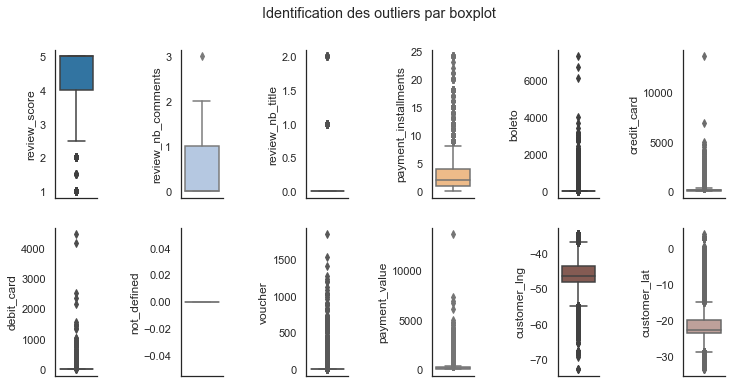

In [81]:
def plot_colonnes_as_box(df: pd.DataFrame, figsize=(12, 6)):
    # mean and median in centre if normal
    numeric_cols = df.select_dtypes('number').columns.tolist()
    print(f'numeric_cols : {numeric_cols}')
    n_rows = 2
    n_cols = (len(numeric_cols)+1) // n_rows
    if (len(numeric_cols) % n_cols) > 0:
        n_rows += 1
    colors = sns.color_palette("tab20").as_hex()[:len(numeric_cols)+1]
    if len(colors) < len(numeric_cols):
        colors = colors + colors  # max 40 colonnes
    _, ax = plt.subplots(figsize=figsize, ncols=n_cols, nrows=n_rows)
    for i, col in enumerate(numeric_cols):
        sns.boxplot(y=df[col], ax=plt.subplot(
            n_rows, n_cols, i+1), color=colors[i])
        sns.despine()
    # espace entre les plots
    plt.subplots_adjust(wspace=2, hspace=0.2)
    plt.suptitle('Identification des outliers par boxplot')
    to_png()


commandes.pipe(plot_colonnes_as_box)


"Distributions_des_colonnes_de_commandes.png"


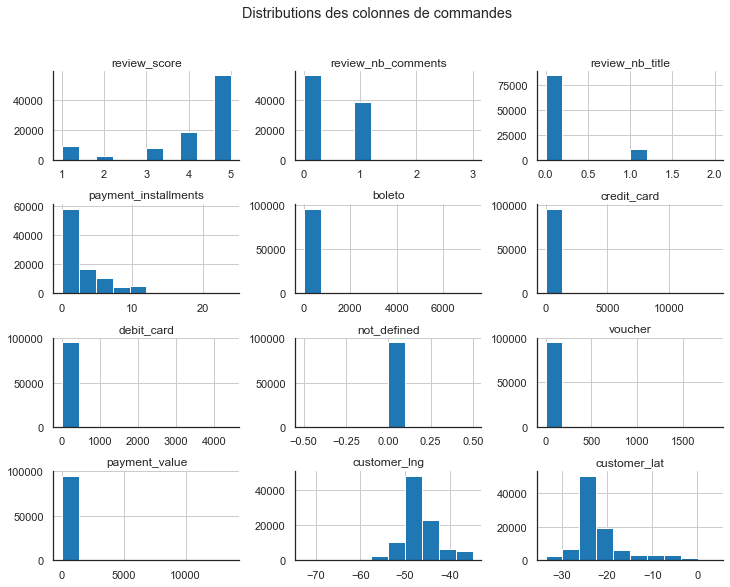

In [82]:
commandes.hist(figsize=(12, 9))
sns.despine()
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Distributions des colonnes de commandes')
to_png()


#### Distribution de Payment installments


"distribution_de_payment_installments.png"


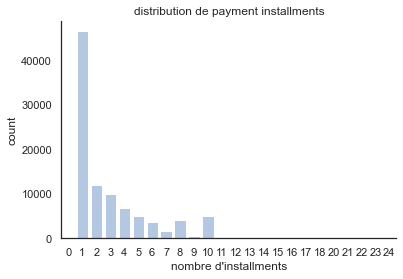

In [83]:
colors = sns.color_palette("tab20").as_hex()
# plt.figure(figsize=(8,5))
sns.countplot(x=commandes['payment_installments'].astype(int), color=colors[1])
sns.despine()
plt.xlabel("nombre d'installments")
plt.title(f'distribution de payment installments')
to_png()


#### Distribution des valeurs des paiements


"Distribution_des_valeurs_des_paiements.png"


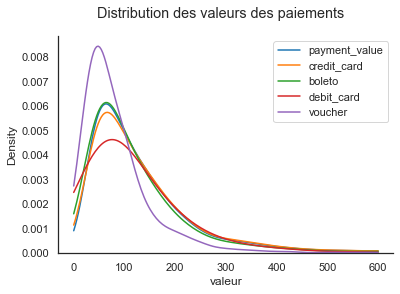

In [84]:
colors = sns.color_palette("tab10").as_hex()


def remove_zeros(series):
    return series[series > 0]


clip_range = (0, 600)

_, ax = plt.subplots()
i = 0
for col in ['payment_value', 'credit_card', 'boleto', 'debit_card', 'voucher']:
    data = remove_zeros(commandes[col])
    sns.kdeplot(data, ax=ax, color=colors[i], clip=clip_range, label=col)
    i = i+1

plt.legend()
sns.despine()
plt.xlabel("valeur")
plt.suptitle(f'Distribution des valeurs des paiements')
to_png()


### Distribution de latitude et longitude


"Distribution_des_latitudes_des_livraisons.png"


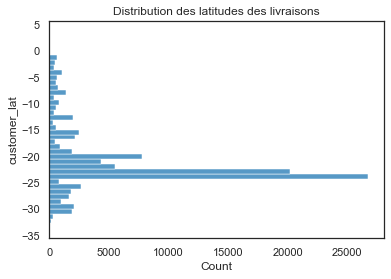

In [85]:
sns.histplot(y=commandes['customer_lat'], bins=40)
plt.title('Distribution des latitudes des livraisons')
to_png()


"Distribution_des_longitudes_des_livraisons.png"


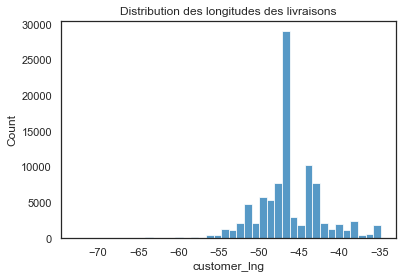

In [86]:
sns.histplot(x=commandes['customer_lng'], bins=40)
plt.title('Distribution des longitudes des livraisons')
to_png()


#### Top villes


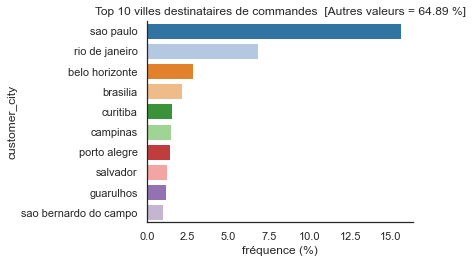

In [87]:
def top_n_freq(df: pd.DataFrame, col, nb=10, others=True, normalize=False):
    """
    Conter la fr√©quence des n tags plus fr√©quents
    return: value_counts comme un dataframe
    """
    nb = max(1, nb)
    counts_df = (df[col].value_counts(normalize=normalize)
                 .to_frame(name='freq')
                 .rename_axis(col)
                 )
    nb = min(nb, len(counts_df))
    top_n = counts_df.head(nb).copy()
    if others:
        top_n.loc['other', 'freq'] = counts_df.iloc[nb:, 0].sum()
    return top_n.reset_index()


def plot_bar_top_n(df: pd.DataFrame, col, nb=20, others=True, normalize=False, sort_values=False, palette=None,
                   ylabel=None, titre='', soustitre=''):
    data = top_n_freq(df, col, nb, others, normalize).copy()
    # print(data.columns.to_list())
    other_count = 0
    if others:
        filter_other = data[col] == 'other'
        other_count = data[filter_other]['freq'].values.sum()
        data = data[~filter_other]
    if sort_values:
        data = data.sort_values(by=col)
    if normalize:
        ax = sns.barplot(y=data[col], x=data['freq'] * 100, palette=palette)
        ax.set_xlabel('fr√©quence (%)')
    else:
        ax = sns.barplot(y=data[col], x=data['freq'], palette=palette)
        ax.set_xlabel("nombre d'occurrences")

    autres = ''
    if others and (other_count > 0):
        if normalize:
            other_count = f'{other_count * 100:.2f} %'
        else:
            other_count = f'{int(other_count)}'
        autres = f' [Autres valeurs = {other_count}]'
    if ylabel:
        ax.set_ylabel(ylabel)
    sns.despine()
    plt.suptitle(titre, y=1.05)
    plt.title(f'{soustitre} {autres}')
    plt.tight_layout()


plot_bar_top_n(commandes, 'customer_city', nb=10, normalize=True,
               soustitre='Top 10 villes destinataires de commandes')


Plus de 15% des commandes sao pour la ville de Sao Paulo

Les Top 10 villes comptent un tier des commandes


### Items command√©s : Distributions des variables num√©riques


In [88]:
commande_items.describe()


review_score  review_nb_comments  review_nb_title  \
count     109343.00           109343.00        109343.00   
mean           4.08                0.42             0.12   
std            1.35                0.50             0.33   
min            1.00                0.00             0.00   
25%            4.00                0.00             0.00   
50%            5.00                0.00             0.00   
75%            5.00                1.00             0.00   
max            5.00                3.00             2.00   

       payment_installments    boleto  credit_card  debit_card  not_defined  \
count             109343.00 109343.00    109343.00   109343.00    109343.00   
mean                   3.01     35.69       137.38        2.25         0.00   
std                    2.80    147.45       245.37       35.65         0.00   
min                    0.00      0.00         0.00        0.00         0.00   
25%                    1.00      0.00        23.98        0.00         0.00   
50%                    2.00      0.00        83.23        0.00         0.00   
75%                    4.00      0.00       164.81        0.00         0.00   
max                   24.00   7274.88     13664.08     4445.50         0.00   

        voucher  payment_value  customer_lng  customer_lat     price  \
count 109343.00      109343.00     109343.00     109343.00 109343.00   
mean       3.58         178.89        -46.22        -21.24    119.87   
std       28.91         269.45          4.03          5.55    181.11   
min        0.00           9.59        -72.67        -33.69      0.85   
25%        0.00          65.50        -48.13        -23.59     39.90   
50%        0.00         114.20        -46.64        -22.93     74.90   
75%        0.00         194.75        -43.69        -20.15    134.17   
max     1839.05       13664.08        -34.80          3.84   6735.00   

       freight_value  seller_lng  seller_lat  product_name_lenght  \
count      109343.00   109343.00   109343.00            109343.00   
mean           19.95      -47.24      -22.80                48.13   
std            15.69        2.34        2.70                11.47   
min             0.00      -63.89      -32.07                 0.00   
25%            13.08      -48.83      -23.61                42.00   
50%            16.26      -46.74      -23.42                51.00   
75%            21.15      -46.52      -21.76                57.00   
max           409.68      -34.86       -2.50                76.00   

       product_description_lenght  product_photos_qty  product_weight_g  \
count                   109343.00           109343.00         109343.00   
mean                       776.32                2.18           2087.40   
std                        653.17                1.73           3738.64   
min                          0.00                0.00              0.00   
25%                        341.00                1.00            300.00   
50%                        595.00                1.00            700.00   
75%                        981.00                3.00           1800.00   
max                       3992.00               20.00          40425.00   

       product_length_cm  product_height_cm  product_width_cm  
count          109343.00          109343.00         109343.00  
mean               30.13              16.54             22.98  
std                16.11              13.41             11.69  
min                 0.00               0.00              0.00  
25%                18.00               8.00             15.00  
50%                25.00              13.00             20.00  
75%                38.00              20.00             30.00  
max               105.00             105.00            118.00

In [89]:
pd.set_option('display.max_rows', 30)
commande_items.skew()


review_score                 -1.35
review_nb_comments            0.35
review_nb_title               2.35
payment_installments          1.57
boleto                       16.34
credit_card                  16.22
debit_card                   65.87
not_defined                   0.00
voucher                      20.33
payment_value                14.37
customer_zip_code_prefix      0.78
customer_lng                 -0.00
customer_lat                  1.62
order_item_id                 7.25
price                         7.76
freight_value                 5.66
seller_zip_code_prefix        1.55
seller_lng                    0.57
seller_lat                    2.79
product_name_lenght          -1.49
product_description_lenght    1.98
product_photos_qty            1.88
product_weight_g              3.60
product_length_cm             1.75
product_height_cm             2.26
product_width_cm              1.72
dtype: float64

"Distributions_des_colonnes_des_items_command√©s.png"


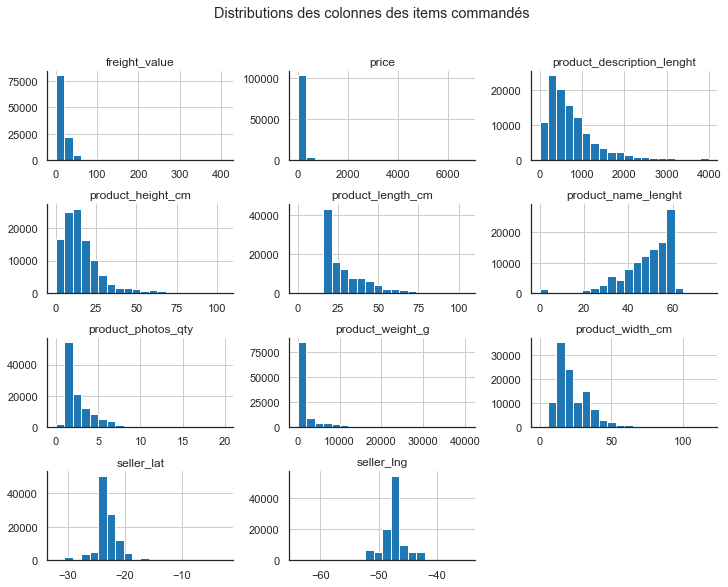

In [90]:
cols_items = sorted(set(commande_items.columns) - set(commandes.columns))

commande_items[cols_items].hist(figsize=(12, 9), bins=20)
sns.despine()
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Distributions des colonnes des items command√©s')
to_png()


### Analyses temporelles


#### Commandes par mois, jour, jour de la semaine, heure du jour


"nombre_de_commandes_par_jour.png"


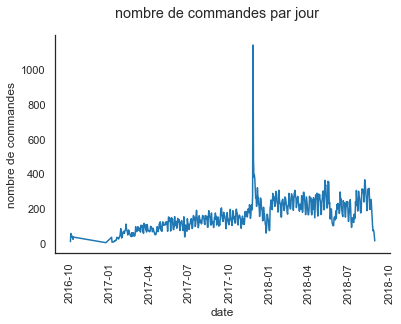

In [91]:
def create_temporal_fields(df, datecol='order_purchase_timestamp'):
    df = df.copy()
    df['date'] = df[datecol].dt.date
    df['year'] = df[datecol].dt.year
    df['month'] = df[datecol].dt.month
    df['year_month'] = df[datecol].dt.strftime('%Y_%m')
    df['weekday'] = df[datecol].dt.weekday
    df['day_name'] = df[datecol].dt.day_name()
    df['hour_of_day'] = df[datecol].dt.hour
    df['time_of_day'] = df[datecol].dt.time
    return df


def drop_temporal_fields(df):
    temp_cols = ['date', 'year', 'month', 'year_month',
                 'weekday', 'day_name', 'hour_of_day', 'time_of_day']
    cols_to_drop = list(set(temp_cols).intersect(set(df.columns)))
    return df.drop(columns=cols_to_drop)


commandes = commandes.pipe(create_temporal_fields)

commandes.groupby('date')['order_id'].count().plot(kind='line')
plt.ylabel('nombre de commandes')
sns.despine()
plt.xticks(rotation=90)
plt.suptitle('nombre de commandes par jour')
to_png()


"valeur_des_commandes_par_jour.png"


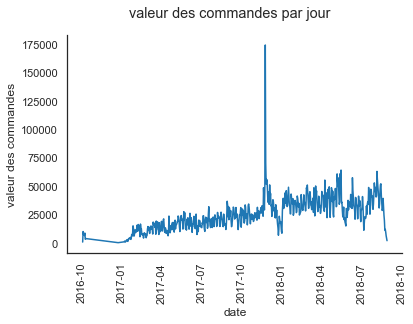

In [92]:
commandes.groupby('date')['payment_value'].sum().plot(kind='line')
plt.ylabel('valeur des commandes')
sns.despine()
plt.xticks(rotation=90)
plt.suptitle('valeur des commandes par jour')
to_png()


In [93]:
commandes['date'].value_counts().head()


2017-11-24    1139
2017-11-25     482
2017-11-27     392
2017-11-26     377
2017-11-28     369
Name: date, dtype: int64

Il avait un grand nombre de commandes la derni√®re semaine de novembre 2017. On ne sait pas si c'est un promotion d'un vendeur, un produit, campagne de marketing?


In [94]:
commande_items = commande_items.pipe(create_temporal_fields)


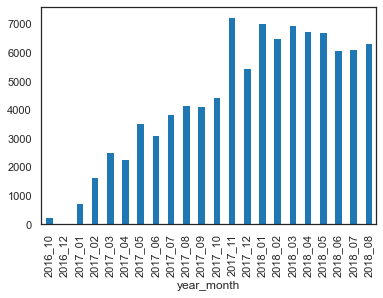

In [95]:
commandes.groupby(['year_month'])['order_id'].count().plot(kind='bar')
plt.show()


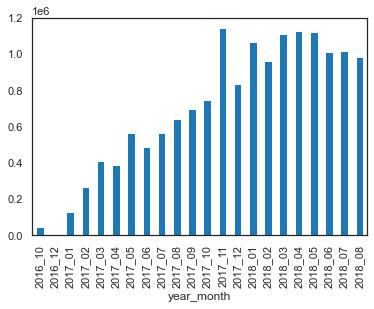

In [96]:
commandes.groupby(['year_month'])['payment_value'].sum().plot(kind='bar')
plt.show()


31.418036191470055


Text(0.5, 0.98, 'pourcentage du valeur pay√© par vouchers chaque mois')

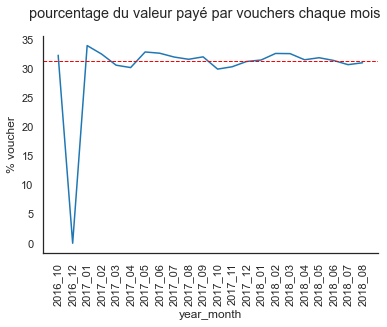

In [97]:
valeurs_par_mois = (commandes.groupby(['year_month', 'payment_type'])
                    .agg({'voucher': 'sum', 'payment_value': 'sum'}).reset_index())

valeurs_par_mois['% voucher'] = valeurs_par_mois['voucher'] / \
    valeurs_par_mois['payment_value']*100
mean_val = valeurs_par_mois['% voucher'].mean()
print(mean_val)

sns.lineplot(data=valeurs_par_mois, x='year_month', y='% voucher', ci=None)
sns.despine()
plt.axhline(mean_val, color='red', linestyle='--', linewidth=1)
plt.xticks(rotation=90)
plt.suptitle('pourcentage du valeur pay√© par vouchers chaque mois')


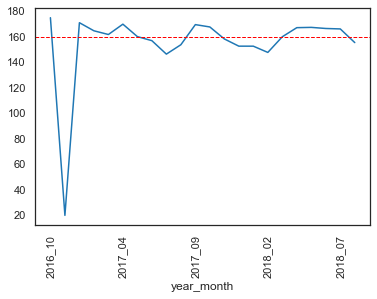

In [98]:
commandes.groupby(['year_month'])['payment_value'].mean().plot(kind='line')
mean_val = commandes['payment_value'].mean()
plt.axhline(mean_val, color='red', linestyle='--', linewidth=1)
plt.xticks(rotation=90)
plt.show()


Le site Olist montre un croissance de nombre de commandes jusqu'√† janvier 2018

- Il n'y a pas assez de donn√©es pour identifier des saisonnalit√©s
- La valeur moyenne de chaque commande reste assez constante (environ 160)
- La pourcentage du valeur pay√© par vouchers chaque mois reste assez constante (32%)


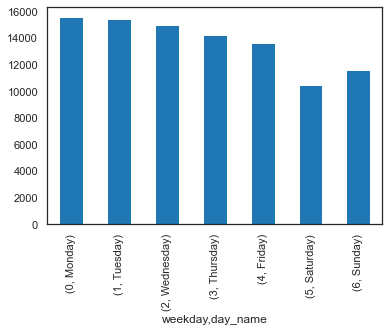

In [99]:
commandes.groupby(['weekday', 'day_name'])['order_id'].count().plot(kind='bar')
plt.show()


Les commandes sont plus fr√©quent au d√©but de la semaine, moins le weekend.


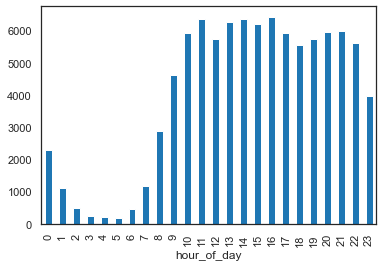

In [100]:
commandes.groupby(['hour_of_day'])['order_id'].count().plot(kind='bar')
plt.show()


Les commandes sont principalement entre 10h du matin et 10h du soir.


## 3.2 Donn√©es cat√©goriques


## 3.3 Associations entre variables cat√©goriques et num√©riques


# 4. Feature Engineering


## 4.1 Nouvelles 'features' cat√©goriques


## 4.2 Nouvelles 'features' num√©riques


## 4.3 Pipeline de Feature Engineering


# 5. Enregistrement des donn√©es nettoy√©es


## 5.1 Sommaire des donn√©es nettoy√©es
